In [2]:
import pandas as pd
# Load json_normalize()
from pandas import json_normalize
import json

In [3]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

2.2.2
1.26.4


In [4]:
data = pd.read_csv(r'./data/tmdb_5000_movies.csv')
display(data)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [5]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
data.set_index('id', inplace=True)

In [7]:
data = data.sort_index()
display(data)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
5,4000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 35, ""name...",NaN,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 613, ""na...",en,Four Rooms,It's Ted the Bellhop's first night on the job....,22.876230,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-12-09,4300000,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,530
11,11000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.starwars.com/films/star-wars-episod...,"[{""id"": 803, ""name"": ""android""}, {""id"": 4270, ...",en,Star Wars,Princess Leia is captured and held hostage by ...,126.393695,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1977-05-25,775398007,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6624
12,94000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://movies.disney.com/finding-nemo,"[{""id"": 494, ""name"": ""father son relationship""...",en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",85.688789,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-05-30,940335536,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,6122
13,55000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...",en,Forrest Gump,A man with a low IQ has accomplished great thi...,138.133331,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-07-06,677945399,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7927
14,15000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.dreamworks.com/ab/,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...",en,American Beauty,"Lester Burnham, a depressed suburban father in...",80.878605,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-09-15,356296601,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Look closer.,American Beauty,7.9,3313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426067,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,[],en,Midnight Cabaret,A Broadway producer puts on a play with a Devi...,0.001389,[],[],1990-01-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The hot spot where Satan's waitin'.,Midnight Cabaret,0.0,0
426469,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",http://www.growingupsmithmovie.com,[],en,Growing Up Smith,"In 1979, an Indian family moves to America wit...",0.710870,[],[],2017-02-03,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It’s better to stand out than to fit in.,Growing Up Smith,7.4,7
433715,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",NaN,"[{""id"": 10060, ""name"": ""christian film""}, {""id...",en,8 Days,"After sneaking to a party with her friends, 16...",0.015295,"[{""name"": ""After Eden Pictures"", ""id"": 85248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-06-15,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,She never knew it could happen to her...,8 Days,0.0,0


In [8]:
data.isna().sum()

#borrar NaN de release_date
data = data.dropna(subset=['release_date'])

#borrar NaN de runtime
data = data.dropna(subset=['runtime'])

# Reemplazar NaN por 'No disponble"
columnas_noDisponibles = {'homepage': 'No disponible', 'tagline': 'No disponible', 'overview': 'No disponible'}
data = data.fillna(columnas_noDisponibles)

data.isna().sum()

budget                  0
genres                  0
homepage                0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [9]:
import pandas as pd

# Assuming `data` is your DataFrame
print(data['production_companies'].head())

import json

def parse_production_companies(entry):
    try:
        # Convert the string to a list of dictionaries
        return json.loads(entry)
    except Exception as e:
        print(f"Failed to parse: {entry} with error: {e}")
        return None  # or [], depending on how you want to handle errors

data['production_companies'] = data['production_companies'].apply(parse_production_companies)

print(data['production_companies'].head())

# Example to filter movies from a specific company
def filter_movies_by_company(data, company_name):
    def is_from_company(companies):
        if isinstance(companies, list):
            return any(company.get('name') == company_name for company in companies)
        return False

    filtered_data = data[data['production_companies'].apply(is_from_company)]
    return filtered_data


id
5     [{"name": "Miramax Films", "id": 14}, {"name":...
11    [{"name": "Lucasfilm", "id": 1}, {"name": "Twe...
12       [{"name": "Pixar Animation Studios", "id": 3}]
13            [{"name": "Paramount Pictures", "id": 4}]
14    [{"name": "DreamWorks SKG", "id": 27}, {"name"...
Name: production_companies, dtype: object
id
5     [{'name': 'Miramax Films', 'id': 14}, {'name':...
11    [{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...
12       [{'name': 'Pixar Animation Studios', 'id': 3}]
13            [{'name': 'Paramount Pictures', 'id': 4}]
14    [{'name': 'DreamWorks SKG', 'id': 27}, {'name'...
Name: production_companies, dtype: object


In [10]:
# cambiar release_adte a datetime
data['release_date'] = pd.to_datetime(data['release_date'])
print(data.dtypes)

budget                           int64
genres                          object
homepage                        object
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object


In [11]:
# Definir la función para extraer los géneros
def extraer_generos(json_list) -> list:
    nombres = []
    for json in json_list:
        nombres.append(json['name'])
    return nombres

# JSON de ejemplo
data['genres'] = data['genres'].apply(lambda x: extraer_generos(x))
display(data['genres'])

TypeError: string indices must be integers, not 'str'

In [ ]:
import json

# Verificar y convertir la columna JSON de tipo string a tipo lista de diccionarios
data['genres'] = data['genres'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Extraer todos los nombres de géneros en una lista para cada fila
data['genre_names'] = data['genres'].apply(lambda x: [genre['name'] for genre in x] if x else [])

print(data[['genre_names']])

                                            genre_names
id                                                     
5                                       [Crime, Comedy]
11                 [Adventure, Action, Science Fiction]
12                                  [Animation, Family]
13                             [Comedy, Drama, Romance]
14                                              [Drama]
...                                                 ...
417859  [Action, Adventure, Animation, Family, Fantasy]
426067                                         [Horror]
426469                          [Comedy, Family, Drama]
433715                                [Thriller, Drama]
447027                                         [Family]

[4800 rows x 1 columns]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
data.rename({'id':'movie_id'})
data.columns

Index(['budget', 'genres', 'homepage', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'nombre_generos', 'genre_names', 'year', 'company_names'],
      dtype='object')

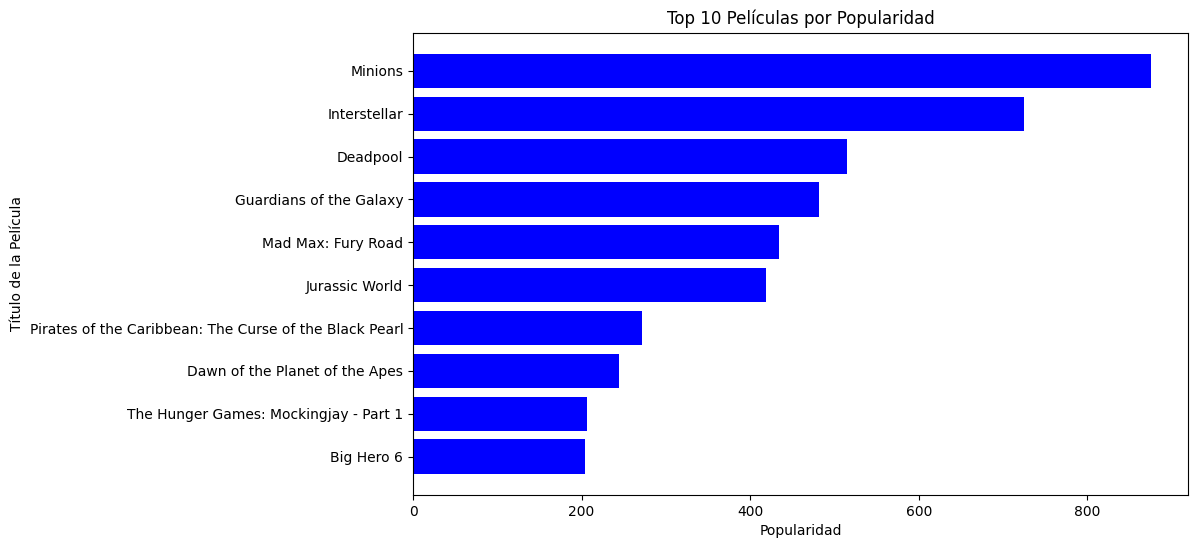

In [ ]:
import matplotlib.pyplot as plt

#Gráfico del Histograma de Datos
# Ordenamos el DataFrame por la columna 'popularity' en orden descendente.
df_sorted = data.sort_values(by='popularity', ascending=False)

# Seleccionamos las top 10 películas más populares. 
# En este ejemplo usamos solo 3 para simplificar, pero el método es escalable.
top_movies = df_sorted.head(10)

# Crear un gráfico de barras con los títulos de las películas en el eje x y la popularidad en el eje y.
plt.figure(figsize=(10, 6))
plt.barh(top_movies['original_title'], top_movies['popularity'], color='blue')
plt.xlabel('Popularidad')
plt.ylabel('Título de la Película')
plt.title('Top 10 Películas por Popularidad')
plt.gca().invert_yaxis()  # Invertir el eje y para que la película más popular esté arriba
plt.show()

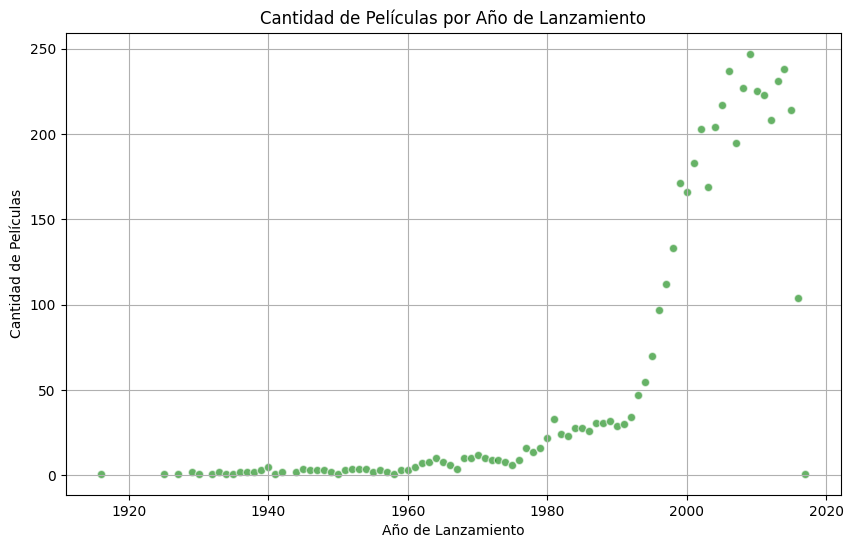

In [ ]:
# Extraer el año de la fecha de lanzamiento
data['year'] = data['release_date'].dt.year

# Contar cuántas películas hay por año
movies_per_year = data.groupby('year').size()

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(movies_per_year.index, movies_per_year.values, color='green', alpha=0.6, edgecolors='w')
plt.title('Cantidad de Películas por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.grid(True)
plt.show()

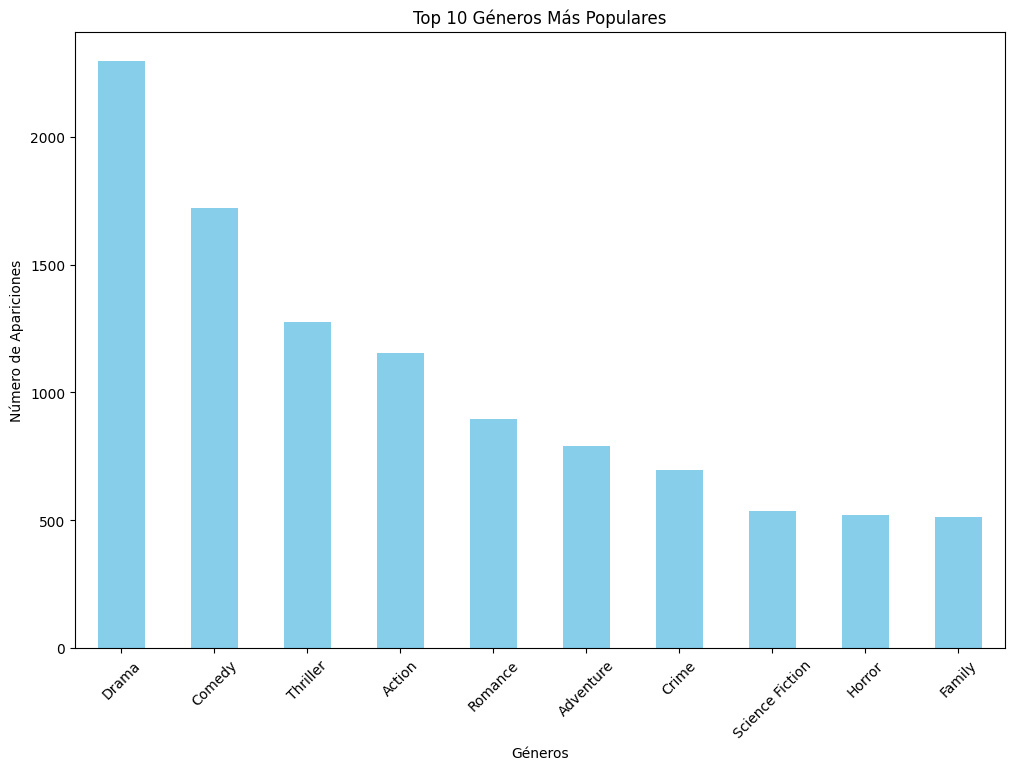

In [ ]:
data['genres'] = data['genres'].apply(lambda x: extraer_generos(x))

import json


print(data[['genre_names']])

######

# Convertir JSON a lista de diccionarios si aún no está hecho
data['genres'] = data['genres'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Extraer todos los nombres de géneros en una lista para cada fila
data['genre_names'] = data['genres'].apply(lambda x: [genre['name'] for genre in x] if x else [])

# Ahora extraer y contar las ocurrencias de cada género
genre_counts = pd.Series([genre for sublist in data['genre_names'] for genre in sublist]).value_counts()

# Seleccionar los top 10 géneros más populares
top_genres = genre_counts.head(10)

# Crear un gráfico de barras para los top 10 géneros
plt.figure(figsize=(12, 8))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Géneros Más Populares')
plt.xlabel('Géneros')
plt.ylabel('Número de Apariciones')
plt.xticks(rotation=45)  # Rota los nombres de géneros para mejor visualización
plt.show()


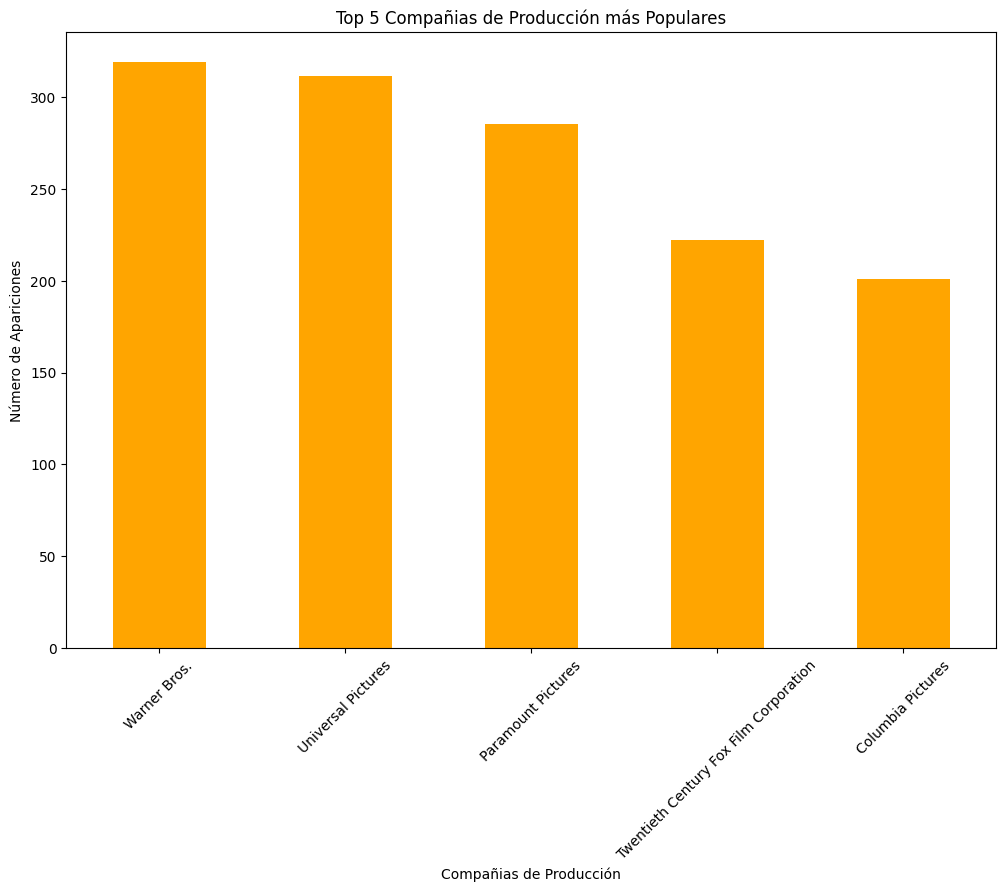

In [ ]:

# Verificar y convertir la columna JSON de tipo string a tipo lista de diccionarios
data['production_companies'] = data['production_companies'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Extraer todos los nombres de las compañías de producción en una lista para cada fila
data['company_names'] = data['production_companies'].apply(lambda x: [company['name'] for company in x] if x else [])

#print(data[['company_names']])


# Ahora extraer y contar las ocurrencias de cada género
company_counts = pd.Series([company for sublist in data['company_names'] for company in sublist]).value_counts()

# Seleccionar los top 10 géneros más populares
top_companies = company_counts.head(5)

# Crear un gráfico de barras para los top 10 géneros
plt.figure(figsize=(12, 8))
top_companies.plot(kind='bar', color='orange')
plt.title('Top 5 Compañias de Producción más Populares')
plt.xlabel('Compañias de Producción')
plt.ylabel('Número de Apariciones')
plt.xticks(rotation=45)  # Rota los nombres de géneros para mejor visualización
plt.show()






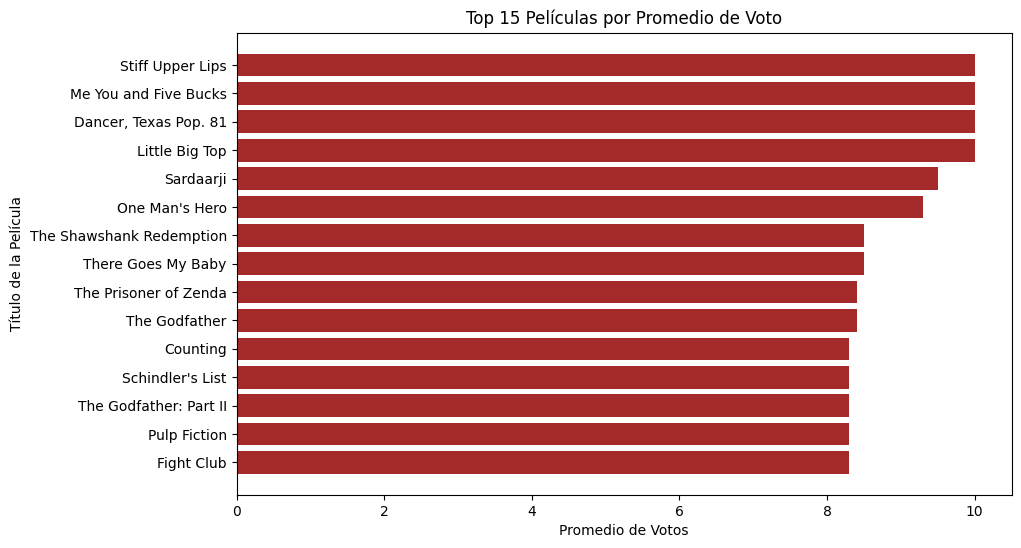

In [ ]:

#Gráfico del Histograma de Datos
# Ordenamos el DataFrame por la columna 'popularity' en orden descendente.
df_sorted = data.sort_values(by='vote_average', ascending=False)

# Seleccionamos las top 10 películas más populares. 
# En este ejemplo usamos solo 3 para simplificar, pero el método es escalable.
top_avrg_movies = df_sorted.head(15)

# Crear un gráfico de barras con los títulos de las películas en el eje x y la popularidad en el eje y.
plt.figure(figsize=(10, 6))
plt.barh(top_avrg_movies['original_title'], top_avrg_movies['vote_average'], color='brown')
plt.xlabel('Promedio de Votos')
plt.ylabel('Título de la Película')
plt.title('Top 15 Películas por Promedio de Voto')
plt.gca().invert_yaxis()  # Invertir el eje y para que la película más popular esté arriba
plt.show()

In [ ]:
print(data["runtime"])


id
5          98.0
11        121.0
12        100.0
13        142.0
14        122.0
          ...  
417859     90.0
426067     94.0
426469    102.0
433715     90.0
447027     88.0
Name: runtime, Length: 4800, dtype: float64


In [ ]:
data.dtypes

budget                           int64
genres                          object
homepage                        object
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
nombre_generos                  object
genre_names                     object
year                             int32
company_names                   object
dtype: object

In [ ]:
data['release_date']

id
5        1995-12-09
11       1977-05-25
12       2003-05-30
13       1994-07-06
14       1999-09-15
            ...    
417859   2011-10-28
426067   1990-01-01
426469   2017-02-03
433715   2014-06-15
447027   2015-10-27
Name: release_date, Length: 4800, dtype: datetime64[ns]

In [ ]:
import pandas as pd
import json



# Parse JSON in 'genres'
data['genres'] = data['genres'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Helper function to check if a specific genre is present
def is_genre_present(genres, genre_name):
    return any(genre['name'] == genre_name for genre in genres)

# Filter movies by genre
def filter_movies_by_genre(data, genre_name):
    return data[data['genres'].apply(is_genre_present, genre_name=genre_name)]

# Get top 5 movies of a specific genre by vote average
def get_top_movies_by_genre(data, genre_name):
    filtered_movies = filter_movies_by_genre(data, genre_name)
    top_movies = filtered_movies.sort_values(by='vote_average', ascending=False).head(5)
    return top_movies[['original_title', 'vote_average', 'release_date']]

# Example: Top 5 Action movies
top_action_movies = get_top_movies_by_genre(data, "Action")
print(top_action_movies)


                original_title  vote_average release_date
id                                                       
69848           One Man's Hero           9.3   1999-08-02
1891   The Empire Strikes Back           8.2   1980-05-17
346                       七人の侍           8.2   1954-04-26
155            The Dark Knight           8.2   2008-07-16
11                   Star Wars           8.1   1977-05-25


In [ ]:
# Function to filter movies by year
def filter_movies_by_year(data, year):
    return data[data['release_date'].dt.year == year]

# Function to get the top 5 movies by vote average
def get_top_movies_by_vote(data):
    return data.sort_values(by='vote_average', ascending=False).head(5)

# Example usage: Get top 5 movies from 2010
year = 2010
filtered_movies = filter_movies_by_year(data, year)
top_movies = get_top_movies_by_vote(filtered_movies)

# Print results
print(top_movies[['original_title', 'vote_average', 'release_date']])

        original_title  vote_average release_date
id                                               
27205        Inception           8.1   2010-07-14
46738        Incendies           7.9   2010-09-04
11324   Shutter Island           7.8   2010-02-18
26022  My Name Is Khan           7.7   2010-02-12
44639       Inside Job           7.7   2010-10-08


In [ ]:
# Filter movies by genre
def filter_movies_by_genre(data, genre_name):
    return data[data['genres'].apply(lambda genre_list: any(genre['name'] == genre_name for genre in genre_list))]

# Get top 5 movies by popularity
def get_top_movies_by_popularity(data):
    return data.sort_values(by='popularity', ascending=False).head(5)

# Example usage: Top 5 Action movies
genre = "Action"
action_movies = filter_movies_by_genre(data, genre)
top_action_movies = get_top_movies_by_popularity(action_movies)

# Print results
print(top_action_movies[['original_title', 'popularity']])

                                           original_title  popularity
id                                                                   
293660                                           Deadpool  514.569956
118340                            Guardians of the Galaxy  481.098624
76341                                  Mad Max: Fury Road  434.278564
135397                                     Jurassic World  418.708552
22      Pirates of the Caribbean: The Curse of the Bla...  271.972889


In [ ]:
data['production_companies'] = data['production_companies'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Filter movies by production company
def filter_movies_by_company(data, company_name):
    return data[data['production_companies'].apply(lambda company_list: any(company['name'] == company_name for company in company_list))]

# Get top 5 movies by vote average
def get_top_movies_by_vote(data):
    return data.sort_values(by='vote_average', ascending=False).head(5)

# Example usage: Top 5 movies by Warner Bros.
company_name = "Warner Bros."
warner_movies = filter_movies_by_company(data, company_name)
top_warner_movies = get_top_movies_by_vote(warner_movies)

# Print results
print(top_warner_movies[['original_title', 'vote_average']])

                         original_title  vote_average
id                                                   
497                      The Green Mile           8.2
311         Once Upon a Time in America           8.2
155                     The Dark Knight           8.2
510     One Flew Over the Cuckoo's Nest           8.2
157336                     Interstellar           8.1


In [ ]:
## A PARTIR DE AQUI ##

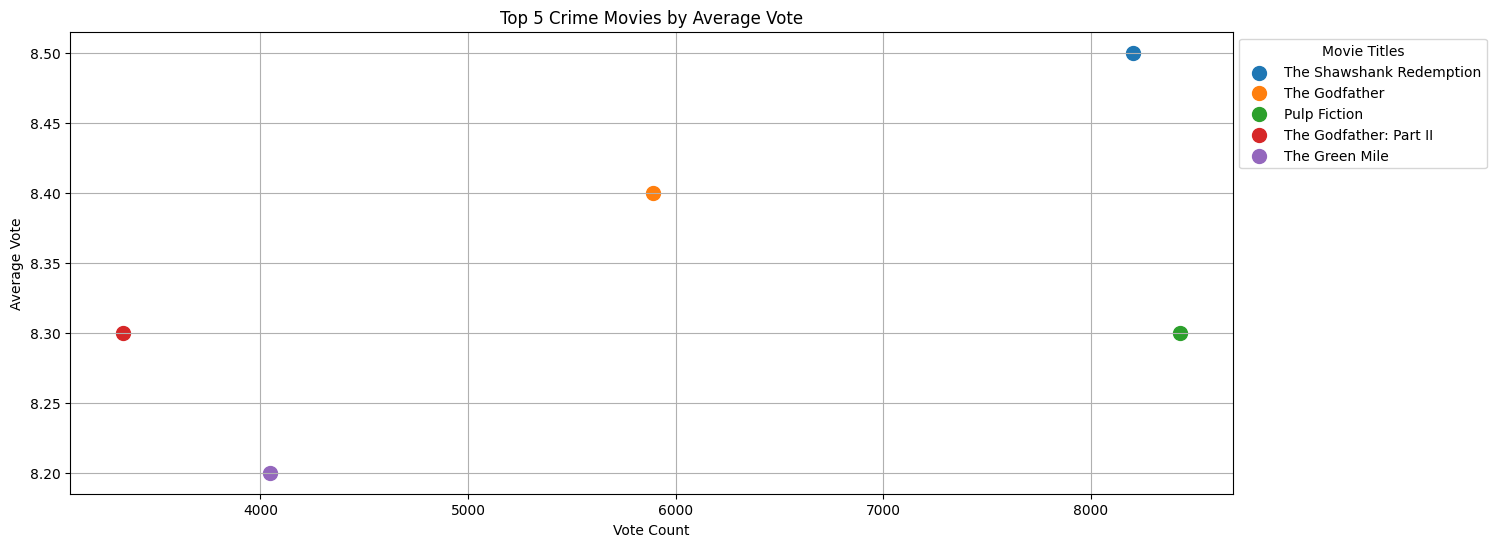

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json

# Assuming data is loaded and 'genres' has been parsed into lists of dictionaries.
# Example data loading and preprocessing might be like this:
# data = pd.read_csv('movies.csv')
data['genres'] = data['genres'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Define functions to filter and retrieve top movies by genre
def filter_by_genre(data, genre_name):
    return data[data['genres'].apply(lambda g: any(genre['name'] == genre_name for genre in g))]

def get_top_movies_by_rating(data, genre_name):
    genre_movies = filter_by_genre(data, genre_name)
    top_movies = genre_movies.sort_values(by='vote_average', ascending=False).head(5)
    return top_movies

# Plot top movies in a scatter plot with individual colors for each movie
def plot_top_movies(data, genre_name):
    top_movies = get_top_movies_by_rating(data, genre_name)
    plt.figure(figsize=(15, 6))  # Wider plot for better layout
    colors = list(mcolors.TABLEAU_COLORS)  # Get a set of color names

    # Create a scatter plot
    for i, (index, row) in enumerate(top_movies.iterrows()):
        plt.scatter(row['vote_count'], row['vote_average'], color=colors[i % len(colors)], s=100, label=row['original_title'])

    plt.xlabel('Vote Count')
    plt.ylabel('Average Vote')
    plt.title(f'Top 5 {genre_name} Movies by Average Vote')
    plt.legend(title="Movie Titles", loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of the plot
    plt.grid(True)
    plt.show()

# Execute for "Crime" genre
plot_top_movies(data, "Crime")


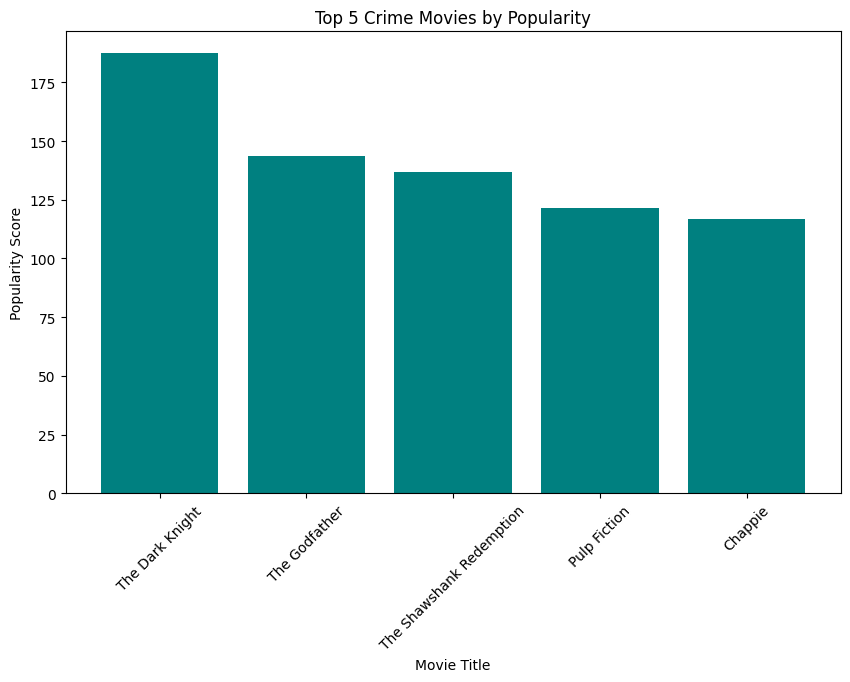

In [ ]:
#movies_data['genres'] = movies_data['genres'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Filter movies by genre
def filter_movies_by_genre(data, genre_name):
    return data[data['genres'].apply(lambda genres: any(genre['name'] == genre_name for genre in genres))]

# Get top 5 movies by popularity
def get_top_movies_by_popularity(data, genre_name):
    genre_movies = filter_movies_by_genre(data, genre_name)
    top_movies = genre_movies.sort_values(by='popularity', ascending=False).head(5)
    return top_movies

# Plot top movies
def plot_top_movies(data, genre_name):
    top_movies = get_top_movies_by_popularity(data, genre_name)
    plt.figure(figsize=(10, 6))
    plt.bar(top_movies['original_title'], top_movies['popularity'], color='teal')
    plt.xlabel('Movie Title')
    plt.ylabel('Popularity Score')
    plt.title(f'Top 5 {genre_name} Movies by Popularity')
    plt.xticks(rotation=45)
    plt.show()

# Example: Plot top 5 Adventure movies
plot_top_movies(data, "Crime")


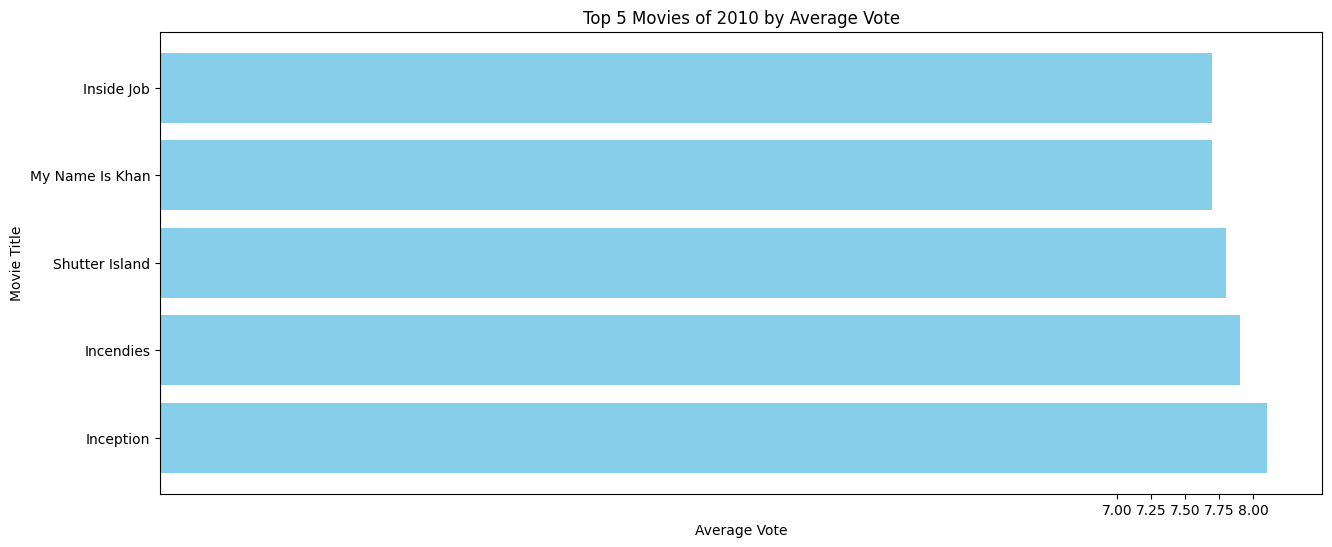

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and has already been loaded with 'release_date' parsed as datetime

# Filter movies by year
def filter_movies_by_year(data, year):
    return data[data['release_date'].dt.year == year]

# Get top 5 movies by vote average
def get_top_movies_by_vote(data, year):
    year_movies = filter_movies_by_year(data, year)
    top_movies = year_movies.sort_values(by='vote_average', ascending=False).head(5)
    return top_movies

# Plot top movies in a horizontal bar chart
def plot_top_movies(data, year):
    top_movies = get_top_movies_by_vote(data, year)
    plt.figure(figsize=(15, 6))  # Adjusted for better display of horizontal bars
    plt.barh(top_movies['original_title'], top_movies['vote_average'], color='skyblue')
    plt.ylabel('Movie Title')
    plt.xlabel('Average Vote')
    plt.title(f'Top 5 Movies of {year} by Average Vote')

    # Setting y-axis scale to have a tick every 0.25 points
    vote_min = top_movies['vote_average'].min() - 0.25  # slightly lower to add breathing room
    vote_max = top_movies['vote_average'].max() + 0.25  # slightly higher to add breathing room
    plt.xticks(ticks=np.arange(int(vote_min), int(vote_max) + 0.25, 0.25))  # adjust ticks on x-axis for clarity

    plt.show()

# Example: Plot top 5 movies of 2010
plot_top_movies(data, 2010)



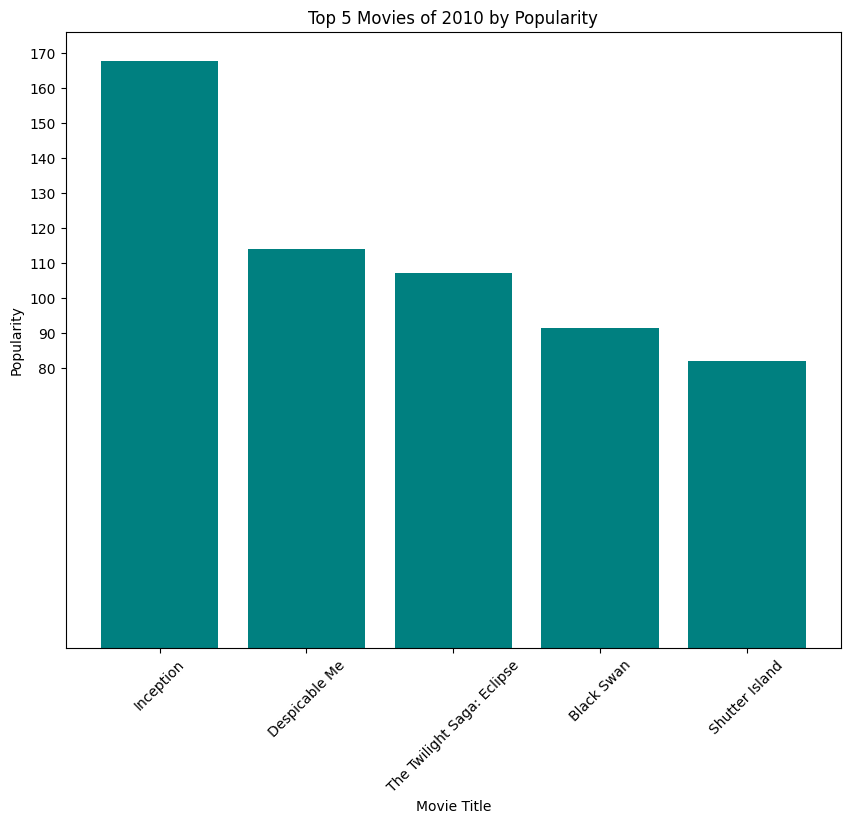

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and has already been loaded with 'release_date' parsed as datetime

# Filter movies by year
def filter_movies_by_year(data, year):
    return data[data['release_date'].dt.year == year]

# Get top 5 movies by popularity
def get_top_movies_by_popularity(data, year):
    year_movies = filter_movies_by_year(data, year)
    top_movies = year_movies.sort_values(by='popularity', ascending=False).head(5)
    return top_movies

# Plot top movies in a vertical bar chart
def plot_top_movies(data, year):
    top_movies = get_top_movies_by_popularity(data, year)
    plt.figure(figsize=(10, 8))  # Adjusted for better display of vertical bars
    plt.bar(top_movies['original_title'], top_movies['popularity'], color='teal')
    plt.ylabel('Popularity')
    plt.xlabel('Movie Title')
    plt.title(f'Top 5 Movies of {year} by Popularity')
    plt.xticks(rotation=45)  # Rotate movie titles for better readability

    # Adjust the y-axis scale dynamically based on the range of popularity values
    popularity_min = top_movies['popularity'].min() - 1  # slightly lower to add breathing room
    popularity_max = top_movies['popularity'].max() + 1  # slightly higher to add breathing room
    plt.yticks(ticks=np.arange(int(popularity_min), int(popularity_max) + 10, 10))  # adjust ticks on y-axis for clarity

    plt.show()

# Example: Plot top 5 movies of 2010
plot_top_movies(data, 2010)



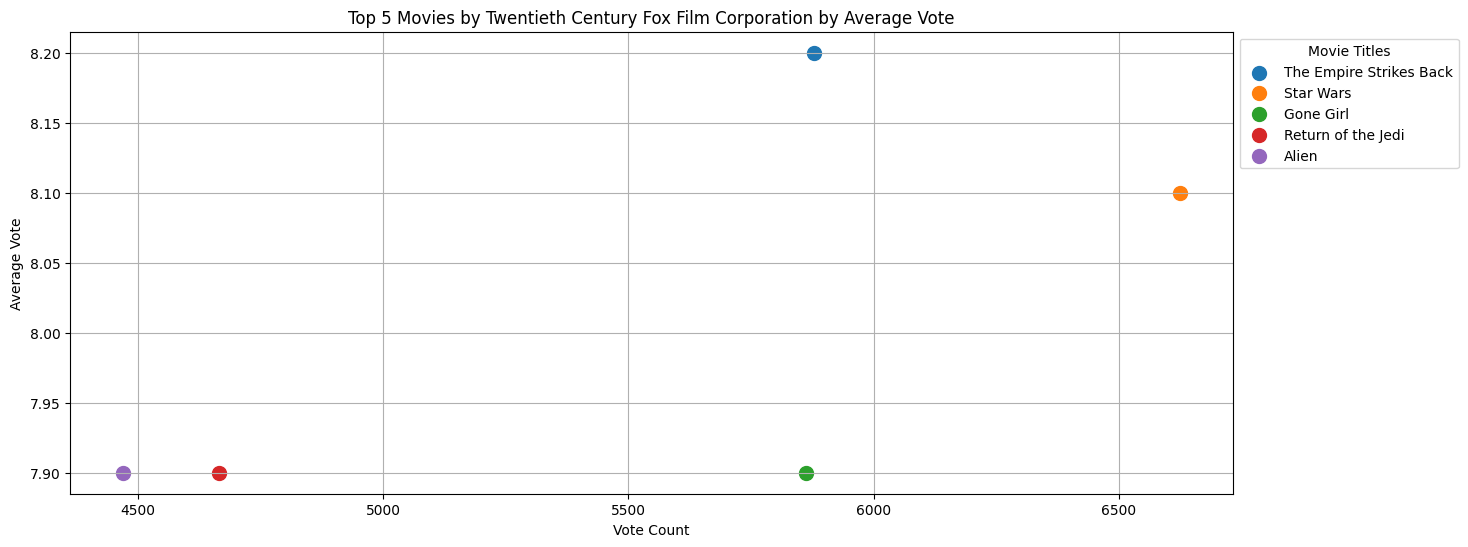

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json

# Assuming data is loaded and properly formatted with 'production_companies' being parsed.
# Example data loading and preprocessing might be like this:
# data = pd.read_csv('movies.csv')
data['production_companies'] = data['production_companies'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Filter movies by production company
def filter_movies_by_company(data, company_name):
    return data[data['production_companies'].apply(lambda companies: any(company['name'] == company_name for company in companies))]

# Get top 5 movies by vote average
def get_top_movies_by_vote(data, company_name):
    company_movies = filter_movies_by_company(data, company_name)
    top_movies = company_movies.sort_values(by='vote_average', ascending=False).head(5)
    return top_movies[['original_title', 'vote_average', 'vote_count']]  # Including vote_count for the scatter plot

# Plot top movies as a scatter plot with a wider aspect ratio
def plot_top_movies(data, company_name):
    top_movies = get_top_movies_by_vote(data, company_name)
    plt.figure(figsize=(15, 6))  # Wider plot
    colors = list(mcolors.TABLEAU_COLORS)  # Get a set of color names from Matplotlib's tableau color set

    # Create a scatter plot
    for i, (index, row) in enumerate(top_movies.iterrows()):
        plt.scatter(row['vote_count'], row['vote_average'], color=colors[i % len(colors)], s=100, label=row['original_title'])

    plt.xlabel('Vote Count')
    plt.ylabel('Average Vote')
    plt.title(f'Top 5 Movies by {company_name} by Average Vote')
    plt.legend(title="Movie Titles", loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of the plot
    plt.grid(True)
    plt.show()

# Example: Plot top 5 movies of Warner Bros.
plot_top_movies(data, "Twentieth Century Fox Film Corporation")


In [ ]:
import pandas as pd
import json

# Sample loading of the dataset from a CSV file, replace 'path_to_file.csv' with your actual file path
# data = pd.read_csv('path_to_file.csv')

# If your data is already in a DataFrame named 'data', you can skip the above line

# Function to parse the 'genres' field and extract genres as a list
def extract_genres(data, movie_title):
    # Ensure the 'genres' column is a list of dictionaries if it is stored as a string
    if isinstance(data['genres'].iloc[0], str):
        data['genres'] = data['genres'].apply(lambda x: json.loads(x))
    
    # Filter the DataFrame for the given movie title
    movie_row = data[data['original_title'] == movie_title]
    
    # Check if any movie was found
    if not movie_row.empty:
        # Extract genre list from the first (and should be only) row
        genres_list = movie_row.iloc[0]['genres']
        # Collect all genre names into a list
        genre_names = [genre['name'] for genre in genres_list]
        return genre_names
    else:
        return "Movie not found"

# Example usage
movie_name = "Four Rooms"  # Assuming you know the movie's title
genres = extract_genres(data, movie_name)
print("Genres of", movie_name, ":", genres)



Genres of Four Rooms : ['Crime', 'Comedy']


In [ ]:
import pandas as pd
import json

# Assuming the dataset is loaded into a DataFrame 'data'
# Example of how the data might be loaded:
# data = pd.read_csv('path_to_your_data.csv')

# Function to parse 'production_companies' and extract the company name
def extract_production_company(data, movie_title):
    # Check if the 'production_companies' column needs to be parsed from JSON
    if isinstance(data['production_companies'].iloc[0], str):
        data['production_companies'] = data['production_companies'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    
    # Find the movie row based on its title
    movie_row = data[data['original_title'] == movie_title]

    # Check if any movie was found
    if not movie_row.empty:
        # Extract the production company list from the first (should be only) row
        production_companies_list = movie_row.iloc[0]['production_companies']
        # Collect all production company names into a list (if there are multiple)
        production_company_names = [company['name'] for company in production_companies_list]
        return production_company_names
    else:
        return "Movie not found"

# Example usage
movie_name = "Four Rooms"  # Assuming you know the movie's title
production_companies = extract_production_company(data, movie_name)
print("Production companies for", movie_name, ":", production_companies)


Production companies for Four Rooms : ['Miramax Films', 'A Band Apart']


In [ ]:
import pandas as pd

# Assuming the dataset is loaded into a DataFrame 'data'
# Example of how the data might be loaded:
# data = pd.read_csv('path_to_your_data.csv', parse_dates=['release_date'])

# Function to extract the release year of a movie by its title
def extract_release_year(data, movie_title):
    # Filter the DataFrame for the given movie title
    movie_row = data[data['original_title'] == movie_title]

    # Check if the movie was found
    if not movie_row.empty:
        # Extract the release year from the 'release_date' column
        release_year = movie_row['release_date'].dt.year.iloc[0]
        return release_year
    else:
        return "Movie not found"

# Example usage
movie_name = "Four Rooms"  # Assuming you know the movie's title
release_year = extract_release_year(data, movie_name)
print(f"The release year of {movie_name} is {release_year}.")


The release year of Four Rooms is 1995.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos desde un CSV
df = data

# Función para obtener las top 5 películas de un idioma específico
def plot_top_5_movies_by_language(data, language):
    # Filtrar las películas por idioma
    filtered_data = data[data['original_language'] == language]
    
    # Ordenar por popularidad de mayor a menor
    sorted_data = filtered_data.sort_values(by='popularity', ascending=False)
    
    # Seleccionar las top 5
    top_5_movies = sorted_data.head(5)
    
    # Crear la gráfica de barras
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_movies['original_title'], top_5_movies['popularity'], color='skyblue')
    plt.xlabel('Movie Title')
    plt.ylabel('Popularity')
    plt.title(f'Top 5 Most Popular Movies in {language} Language')
    plt.xticks(rotation=45)
    plt.show()

# Llamada a la función para visualizar
plot_top_5_movies_by_language(df, 'en')


FileNotFoundError: [Errno 2] No such file or directory: 'tu_archivo.csv'